### The dataset used here is IBM stock prices from Quandl.com.

In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

In [2]:
# import the qunadl library to get the dataset
import quandl
ibm_data = quandl.get("EOD/IBM", authtoken="xCvhVuyxxCfKv25dSKuY")

ibm_data.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
1962-01-02,578.5,578.5,572.0,572.00,19360.0,0.0,1.0,14.436135,14.436135,14.273931,14.273931,387200.0
1962-01-03,572.0,577.0,572.0,577.00,14400.0,0.0,1.0,14.273931,14.398703,14.273931,14.398703,288000.0
1962-01-04,577.0,577.0,571.0,571.25,12800.0,0.0,1.0,14.398703,14.398703,14.248977,14.255215,256000.0
1962-01-05,570.5,570.5,559.0,560.00,18160.0,0.0,1.0,14.236500,14.236500,13.949524,13.974478,363200.0
1962-01-08,559.5,559.5,545.0,549.50,27200.0,0.0,1.0,13.962001,13.962001,13.600162,13.712457,544000.0


In [3]:
ibm_data.tail()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2019-03-04,139.99,140.0800,137.1700,138.43,3406964.0,0.0,1.0,139.99,140.0800,137.1700,138.43,3406964.0
2019-03-05,138.37,138.7400,137.5550,137.88,4250650.0,0.0,1.0,138.37,138.7400,137.5550,137.88,4250650.0
2019-03-06,138.12,138.3892,136.7200,136.98,2768256.0,0.0,1.0,138.12,138.3892,136.7200,136.98,2768256.0
2019-03-07,136.61,136.8900,134.6343,135.36,4358264.0,0.0,1.0,136.61,136.8900,134.6343,135.36,4358264.0
2019-03-08,134.21,135.2400,133.5800,135.09,3773642.0,0.0,1.0,134.21,135.2400,133.5800,135.09,3773642.0


In [4]:
ibm_data = ibm_data[['Adj_Open',  'Adj_High',  'Adj_Low',  'Adj_Close', 'Adj_Volume']]

#### creating two new columns high low percent change and the percentage change happening daily in the stock prices


ibm_data['HL_PCT'] = (ibm_data['Adj_High'] - ibm_data['Adj_Low']) / ibm_data['Adj_Close'] * 100.0
ibm_data['PCT_change'] = (ibm_data['Adj_Close'] - ibm_data['Adj_Open']) / ibm_data['Adj_Open'] * 100.0

In [5]:
ibm_data.head()

,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,HL_PCT,PCT_change
Date,,,,,,,
1962-01-02,14.436135,14.436135,14.273931,14.273931,387200.0,1.136364,-1.123596
1962-01-03,14.273931,14.398703,14.273931,14.398703,288000.0,0.866551,0.874126
1962-01-04,14.398703,14.398703,14.248977,14.255215,256000.0,1.050328,-0.996534
1962-01-05,14.236500,14.236500,13.949524,13.974478,363200.0,2.053571,-1.840491
1962-01-08,13.962001,13.962001,13.600162,13.712457,544000.0,2.638763,-1.787310


In [6]:
#using the important columns

ibm_data = ibm_data[['Adj_Close', 'HL_PCT', 'PCT_change', 'Adj_Volume']]

ibm_data.head()

,Adj_Close,HL_PCT,PCT_change,Adj_Volume
Date,,,,
1962-01-02,14.273931,1.136364,-1.123596,387200.0
1962-01-03,14.398703,0.866551,0.874126,288000.0
1962-01-04,14.255215,1.050328,-0.996534,256000.0
1962-01-05,13.974478,2.053571,-1.840491,363200.0
1962-01-08,13.712457,2.638763,-1.787310,544000.0


#### we are creating a column called Label which will be used for prediction.The label column contains tomorrow's price based on yesterday's price.we can also change it to price after 10 days.We will be using Adj_close column to create the predicting column

In [7]:
import math

forecast_col = 'Adj_Close'
ibm_data.fillna(value=-99999, inplace=True)     #### outlier value added as ML model doesnt work with missing data
forecast_out = int(math.ceil(0.01 * len(ibm_data)))   #### shfting the column to tomorrow's price based on yesterday's

ibm_data['label'] = ibm_data[forecast_col].shift(-forecast_out)   #### new column 
ibm_data.dropna(inplace = True)

ibm_data.head()

,Adj_Close,HL_PCT,PCT_change,Adj_Volume,label
Date,,,,,
1962-01-02,14.273931,1.136364,-1.123596,387200.0,9.379869
1962-01-03,14.398703,0.866551,0.874126,288000.0,9.666596
1962-01-04,14.255215,1.050328,-0.996534,256000.0,9.657363
1962-01-05,13.974478,2.053571,-1.840491,363200.0,9.389102
1962-01-08,13.712457,2.638763,-1.787310,544000.0,9.626170


In [8]:
ibm_data.tail()

,Adj_Close,HL_PCT,PCT_change,Adj_Volume,label
Date,,,,,
2018-08-03,142.598560,3.331077,3.113655,8053557.0,138.43
2018-08-06,140.986241,1.116209,-0.626063,3913743.0,137.88
2018-08-07,141.932392,0.877491,0.245482,3505629.0,136.98
2018-08-08,141.816537,0.810130,-0.298649,3581323.0,135.36
2018-08-09,141.285534,0.835809,-0.522229,3093504.0,135.09


In [9]:
###### scale the features of the dataset using scale module for better processing time and also increase the accuracy
###### The scale module brings the dataset within a particular range.ex: -1 to 1

from sklearn import preprocessing

X = np.array(ibm_data.drop(['label'], 1))  ### dropping the predictor column
y = np.array(ibm_data['label'])            ### y contains the predictor column

X = preprocessing.scale(X)  ### scaling the input features
y = np.array(ibm_data['label'])



### Model creation


1.Linear Regression

In [10]:
from sklearn import model_selection,svm
from sklearn.linear_model import LinearRegression

### splitting the dataset into training data and testing data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.4,random_state = 100)

clf = LinearRegression() ### creating the LinearRegression object

clf.fit(X_train, y_train) ### fitting the model with training dataset i.e., training the model on training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
y_pred = clf.predict(X_test)

#y_train_pred = clf.predict(X_train)

y_test

array([  9.01478609,   8.62861636,  16.02074095, ...,  14.84536286,
         6.53556395, 138.65283994])

In [17]:
y_pred

array([ 13.10193532,   8.4932454 ,  12.61629343, ...,  19.25444547,
        10.25570576, 137.85452146])

In [19]:
#confidence = clf.score(X_test, y_test)
#confidence

from sklearn.metrics import r2_score

scc = r2_score(y_test,y_pred)
scc

0.9652786635404031

In [74]:
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((y_train - y_train_pred) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((y_test - y_pred) ** 2))

Fit a model X_train, and calculate MSE with X_test and Y_test: 84.14
Fit a model X_train, and calculate MSE with X_test and Y_test: 82.32


Text(0.5,1,u'Residual Plots')

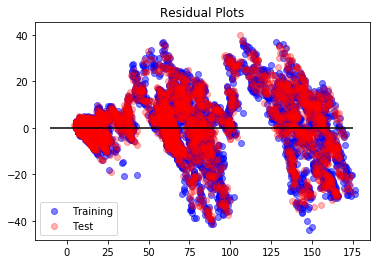

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

# Scatter plot the training data
train = plt.scatter(y_train_pred,(y_train-y_train_pred),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(y_pred,(y_test-y_pred),c='r',alpha=0.3)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=175)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

#### The Linear model gave the accuracy of 96 which is good and also we can see the MSE of training and testing data is almost the same which indicated a good model.


#### The secind model is SVR .
2.SVR

In [80]:
#### trying the different Kernels of SVM and finding the accuracy of the model

for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print(k,confidence)

('linear', 0.9646859392961672)
('poly', 0.5362475351573796)
('rbf', 0.9526069357556108)
('sigmoid', -7.240047756144503)


#### As we can see, the linear kernel performed the best

In [81]:
ibm_data.head()

,Adj_Close,HL_PCT,PCT_change,Adj_Volume,label
Date,,,,,
1962-01-02,14.273931,1.136364,-1.123596,387200.0,9.379869
1962-01-03,14.398703,0.866551,0.874126,288000.0,9.666596
1962-01-04,14.255215,1.050328,-0.996534,256000.0,9.657363
1962-01-05,13.974478,2.053571,-1.840491,363200.0,9.389102
1962-01-08,13.712457,2.638763,-1.787310,544000.0,9.626170
